In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import astropy.units as u
import pandas as pd

In [36]:
## READS IN CSVs WITH NSC OCCUPATION FRACTION DATA FROM NEUMAYER

early_occ = pd.read_csv('NSC_OccFrac_early.csv', header=None)
early_occ_x = early_occ[0].values
early_occ_y = early_occ[1].values

late_occ = pd.read_csv('NSC_OccFrac_late.csv', header=None)
late_occ_x = late_occ[0].values
late_occ_y = late_occ[1].values

all_occ_x = np.concatenate((early_occ_x, late_occ_x))
all_occ_y = np.concatenate((early_occ_y, late_occ_y))

#early_occ.tail() #checks early csv to make sure values are as expected
#late_occ.head()  #checks late csv to make sure values are as expected

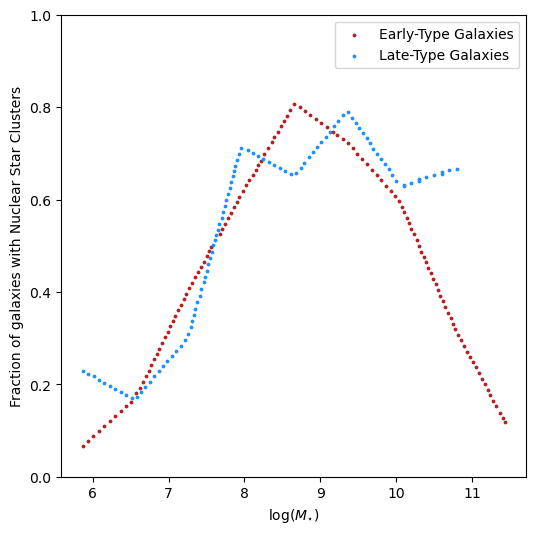

In [50]:
## CHECKS CSV POINTS TO MAKE SURE WE'RE WORKING WITH CORRECT DATA
plt.figure(figsize = (6, 6))

plt.scatter(early_occ_x, early_occ_y, marker='o', s=3, color='firebrick', label='Early-Type Galaxies')
plt.scatter(late_occ_x, late_occ_y, marker='o', s=3, color='dodgerblue', label='Late-Type Galaxies')
plt.xlabel(r'log($M_{\star}$)')
plt.ylabel('Fraction of galaxies with Nuclear Star Clusters')
plt.ylim(0, 1)
plt.legend()

In [114]:
## FINDS LINES OF BEST FIT FOR EARLY, LATE, AND ALL GALAXIES

degree = 4

early_coeff = np.polyfit(early_occ_x, early_occ_y, degree)
late_coeff = np.polyfit(late_occ_x, late_occ_y, degree)
all_coeff = np.polyfit(all_occ_x, all_occ_y, degree)

early_eq = np.poly1d(early_coeff)
late_eq = np.poly1d(late_coeff)
all_eq = np.poly1d(all_coeff)

print('The line of best fit for early-type galaxies is:', early_eq)
print('The line of best fit for late-type galaxies is:', late_eq)
print('The line of best fit for all-type galaxies is:', all_eq)

The line of best fit for early-type galaxies is:           4          3         2
0.009027 x - 0.3226 x + 4.165 x - 22.93 x + 45.73
The line of best fit for late-type galaxies is:         4        3         2
0.0199 x - 0.68 x + 8.552 x - 46.73 x + 93.85
The line of best fit for all-type galaxies is:           4          3         2
0.008252 x - 0.3008 x + 3.959 x - 22.22 x + 45.21


The sum of squared errors is: 0.6860922855593291


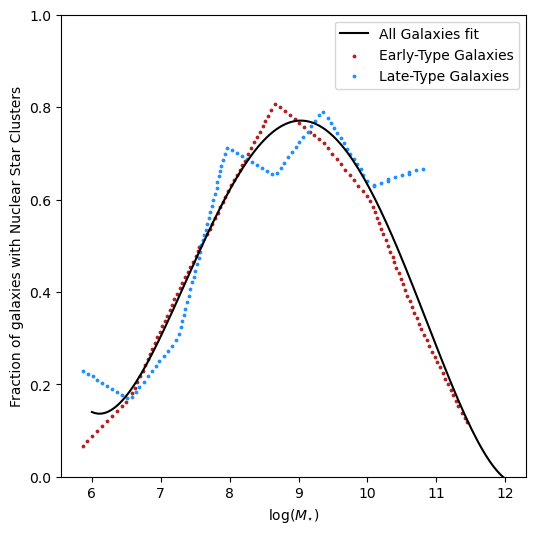

In [115]:
## PLOTS LINES OF BEST FIT FROM ABOVE
num_points = 150
x = np.linspace(6, 12, num_points)
offset = 0

plt.figure(figsize=(6,6))

#plt.plot(x, early_eq(x) + offset, color = 'firebrick', label='Early-Type Galaxies fit')
#plt.plot(x, late_eq(x), color='dodgerblue', label='Late-Type Galaxies fit')
plt.plot(x, all_eq(x) + offset, color='black', label='All Galaxies fit')

plt.scatter(early_occ_x, early_occ_y, marker='o', s=3, color='firebrick', label='Early-Type Galaxies')
plt.scatter(late_occ_x, late_occ_y, marker='o', s=3, color='dodgerblue', label='Late-Type Galaxies')
plt.xlabel(r'log($M_{\star}$)')
plt.ylabel('Fraction of galaxies with Nuclear Star Clusters')
plt.ylim(0, 1)
plt.legend()

## CALCULATES SSE TO FIND BEST OFFSET VALUE 

y_predicted = np.array(all_eq(all_occ_x)+offset)
y_actual = np.array(all_occ_y)

SSE = np.sum((y_predicted - y_actual)**2)
print('The sum of squared errors is:', SSE)